In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [118]:
df=pd.read_csv("knn_dataset.csv")

In [120]:
df

,Length,Weight,Cost
0,10,15,45
1,11,6,37
2,12,14,48
3,7,9,33
4,9,14,38
5,8,12,40
6,6,11,35
7,15,10,50
8,14,8,46
9,7,12,35


In [122]:
X = df[['Length', 'Weight']]
y = df['Cost']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [128]:
def knn_regression(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_neighbors_indices = np.argsort(distances)[:k]
        k_neighbors_targets = [y_train[i] for i in k_neighbors_indices]
        y_pred.append(np.mean(k_neighbors_targets))
    return np.array(y_pred)

In [130]:
new_data_point = np.array([7, 8])

In [149]:
k = 3
predicted_cost = knn_regression_single(X_train.to_numpy(), y_train.to_numpy(), new_data_point, k)
print(f"Predicted Cost for Length=7 and Weight=8: {predicted_cost:.2f}")

Predicted Cost for Length=7 and Weight=8: 31.67


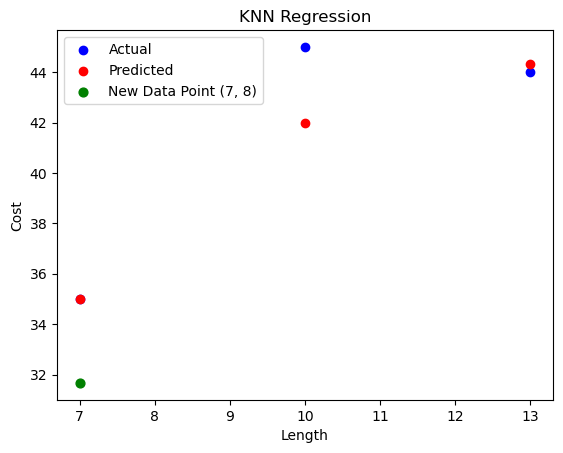

In [151]:
plt.scatter(X_test['Length'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Length'], y_pred, color='red', label='Predicted')
plt.scatter(new_data_point[0], predicted_cost, color='green', marker='o', s=40, label='New Data Point (7, 8)')
plt.xlabel('Length')
plt.ylabel('Cost')
plt.title('KNN Regression')
plt.legend()
plt.show()